<a href="https://colab.research.google.com/github/ArhanWR/Pengolahan-Citra-dan-Visi-Komputer/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum
**Kelompok 9**

**Nama Anggota :**

1. Abdullah Khafabi / 2041720050

7. Alfan Farchi Al-Hadi / 2141720084

**10. Arhan Windu Rizki Putra Budianto / 2141720227**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)


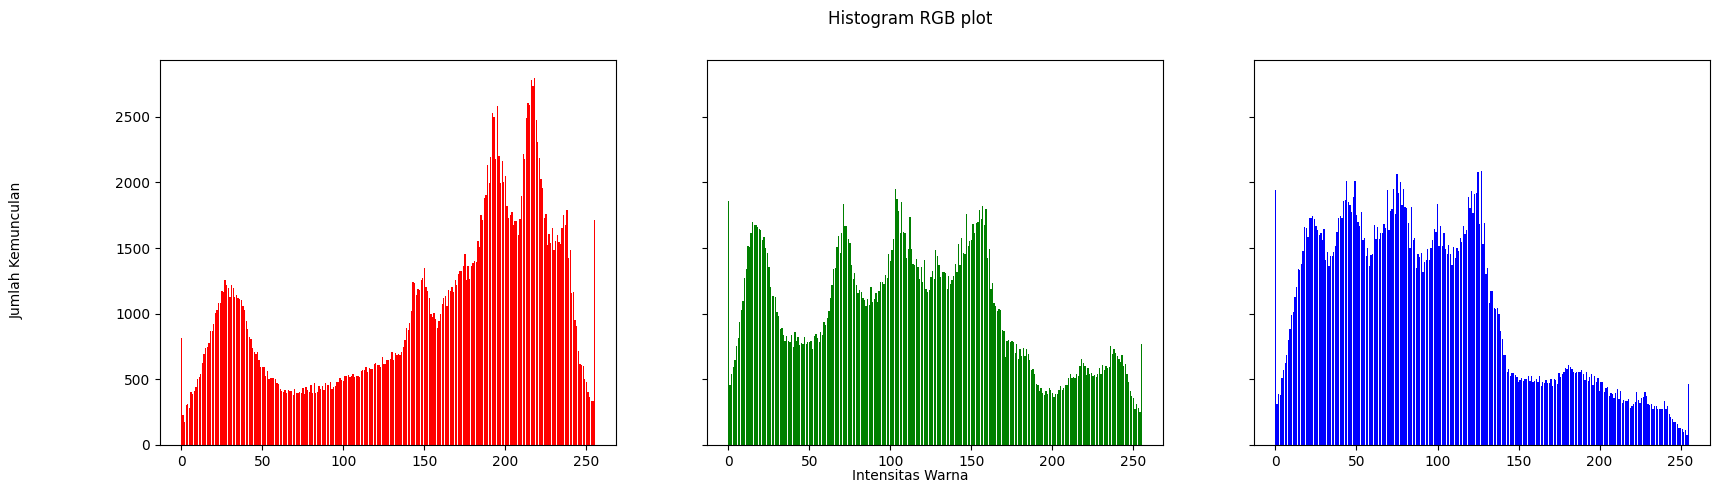

In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, _ = img.shape

blue = [0] * 256
green = [0] * 256
red = [0] * 256

for y in range(height):
    for x in range(width):
        blue[img[y, x, 0]] += 1
        green[img[y, x, 1]] += 1
        red[img[y, x, 2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

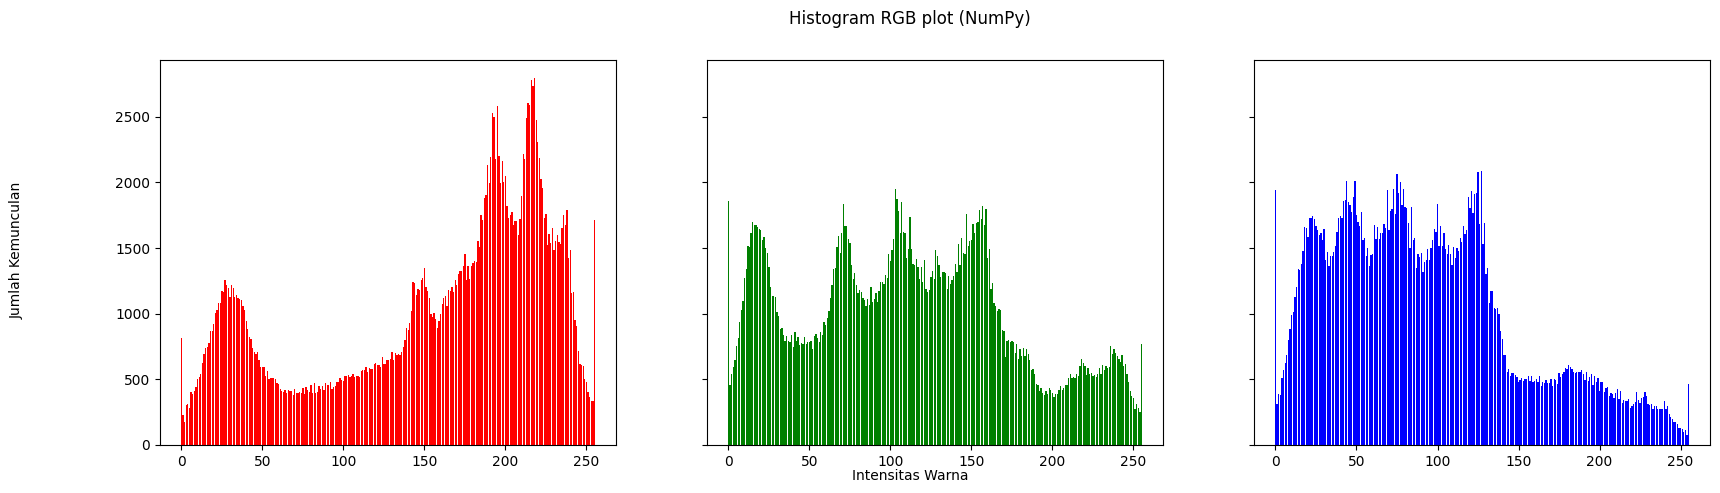

In [5]:
hist_blue, _ = np.histogram(img[:, :, 0], bins=256, range=(0, 256))
hist_green, _ = np.histogram(img[:, :, 1], bins=256, range=(0, 256))
hist_red, _ = np.histogram(img[:, :, 2], bins=256, range=(0, 256))

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot (NumPy)')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0].bar(names, hist_red, color='red')
axs[1].bar(names, hist_green, color='green')
axs[2].bar(names, hist_blue, color='blue')

plt.show()

Output yang dilakukan dengan OpenCV dan Numpy memiliki hasil yang sama tidak ada perbedaan sama sekali.

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)


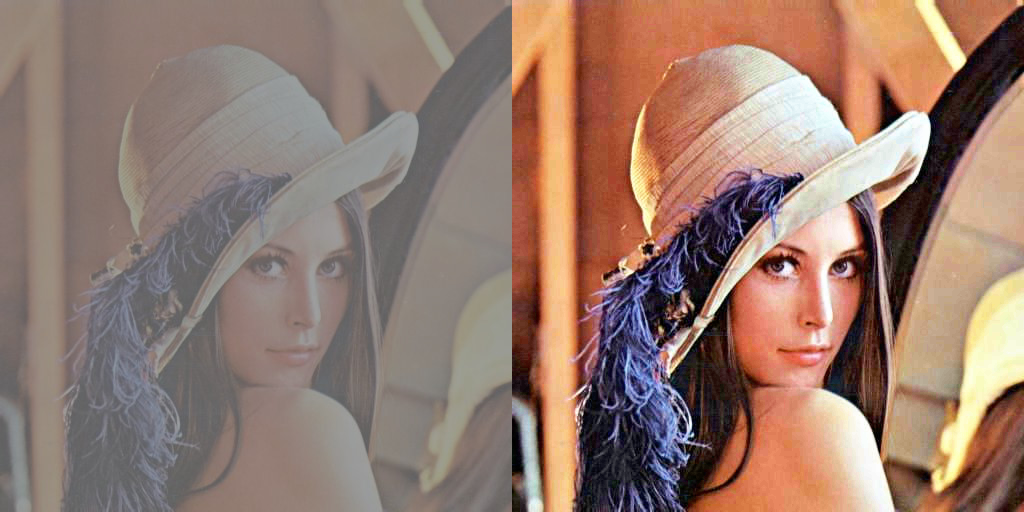

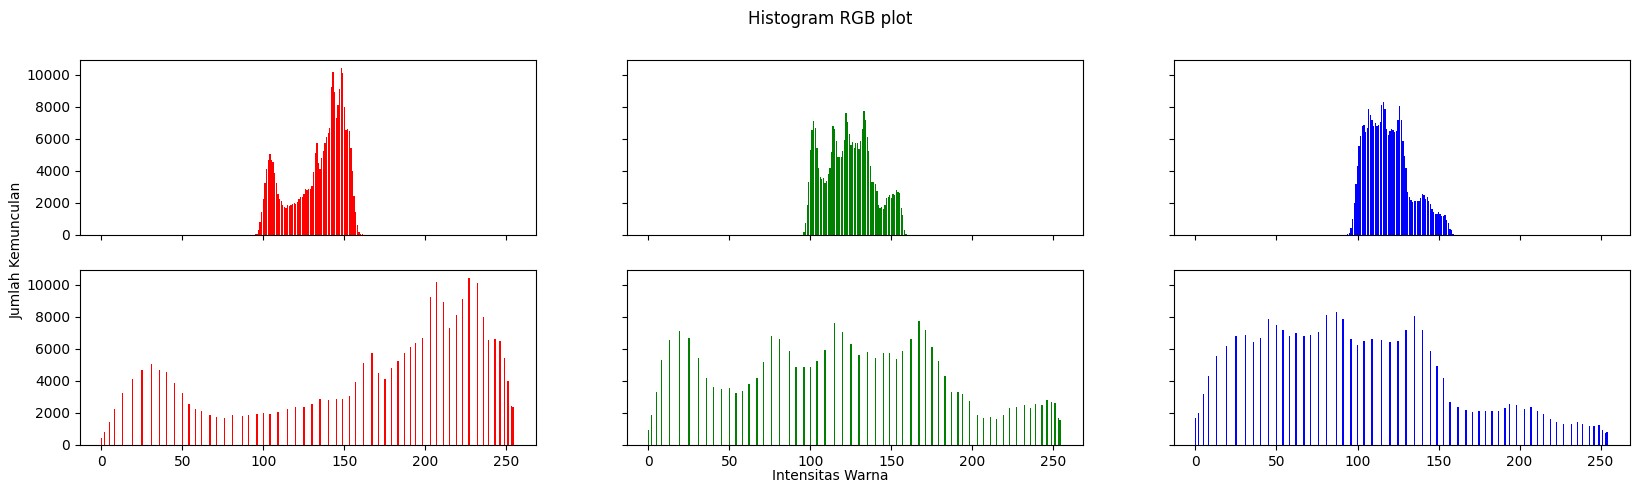

In [6]:
img1 = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')

def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

img_array = np.asarray(img1)

histogram_array = np.bincount(img_array.flatten(), minlength=256)

num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

chistogram_array = np.cumsum(histogram_array)

transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

img_list = list(img_array.flatten())

eq_img_list = [transform_map[p] for p in img_list]

eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2))
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
    fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0,0].bar(names, histo_asli[2], color='red')
    axs[0,1].bar(names, histo_asli[1], color='green')
    axs[0,2].bar(names, histo_asli[0], color='blue')
    axs[1,0].bar(names, equal_histo[2], color='red')
    axs[1,1].bar(names, equal_histo[1], color='green')
    axs[1,2].bar(names, equal_histo[0], color='blue')
else:
    fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
    fig. suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0,0].bar(names, histo_asli[2], color='gray')
    axs[0,1].bar(names, equal_histo[2], color='gray')

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

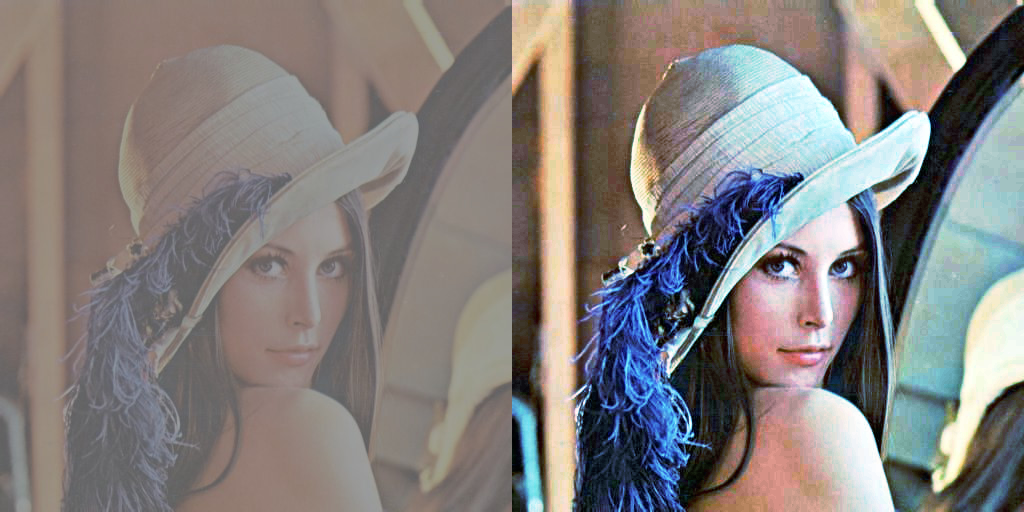

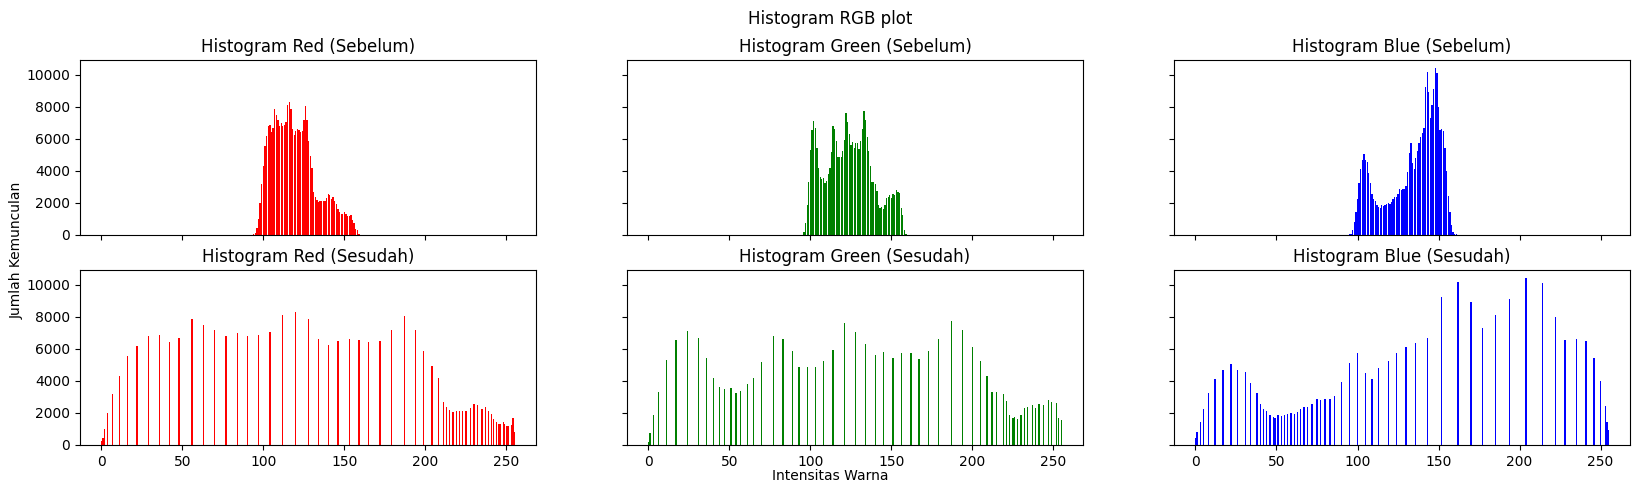

In [7]:
def histog(img):
    height, width, depth = np.shape(img)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img[y][x][0]] += 1
            ax[1][img[y][x][1]] += 1
            ax[2][img[y][x][2]] += 1
    return ax

histo_asli = histog(img1)

equalized_channels = [cv.equalizeHist(img1[:, :, i]) for i in range(3)]

img2 = cv.merge(equalized_channels)

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2))
cv2_imshow(final_frame)

names = np.arange(256)

fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

for i, color in enumerate(['red', 'green', 'blue']):
    axs[0, i].bar(names, histo_asli[i], color=color)
    axs[0, i].set_title(f'Histogram {color.capitalize()} (Sebelum)')

    axs[1, i].bar(names, equal_histo[i], color=color)
    axs[1, i].set_title(f'Histogram {color.capitalize()} (Sesudah)')

plt.show()

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)


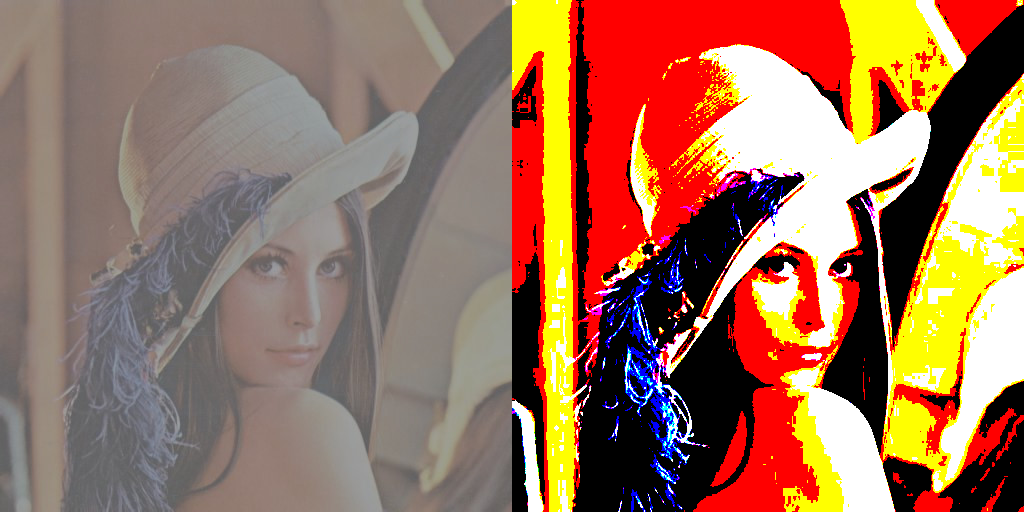

In [8]:
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

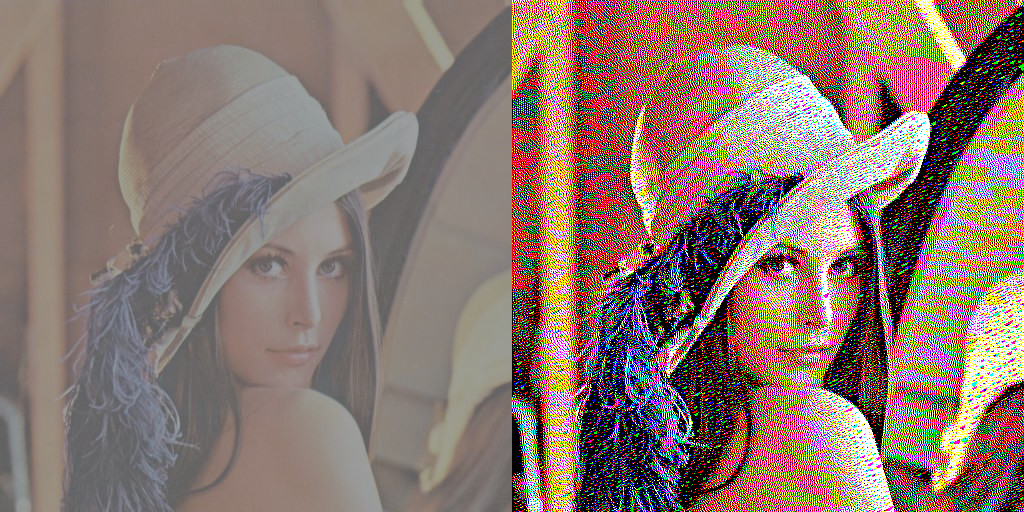

In [9]:
height, width, _ = img1.shape

def dithering_floyd_steinberg(img1):
    output_img = np.copy(img1)
    for y in range(height):
        for x in range(width):
            for channel in range(3):
                old_pixel = output_img[y, x, channel]
                new_pixel = 255 if old_pixel > 128 else 0
                output_img[y, x, channel] = new_pixel
                error = old_pixel - new_pixel

                if x < width - 1:
                    output_img[y, x + 1, channel] += error * 7 / 16
                if y < height - 1:
                    output_img[y + 1, x - 1, channel] += error * 5 / 16
                    output_img[y + 1, x, channel] += error * 3 / 16
                    if x < width - 1:
                        output_img[y + 1, x + 1, channel] += error * 1 / 16
    return output_img

dithered_img = dithering_floyd_steinberg(img)

imgori = cv.cvtColor(img1, cv.COLOR_RGBA2RGB)
imgresult = cv.cvtColor(dithered_img, cv.COLOR_RGBA2RGB)
final_frame = cv.hconcat((imgori, imgresult))
cv2_imshow(final_frame)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!


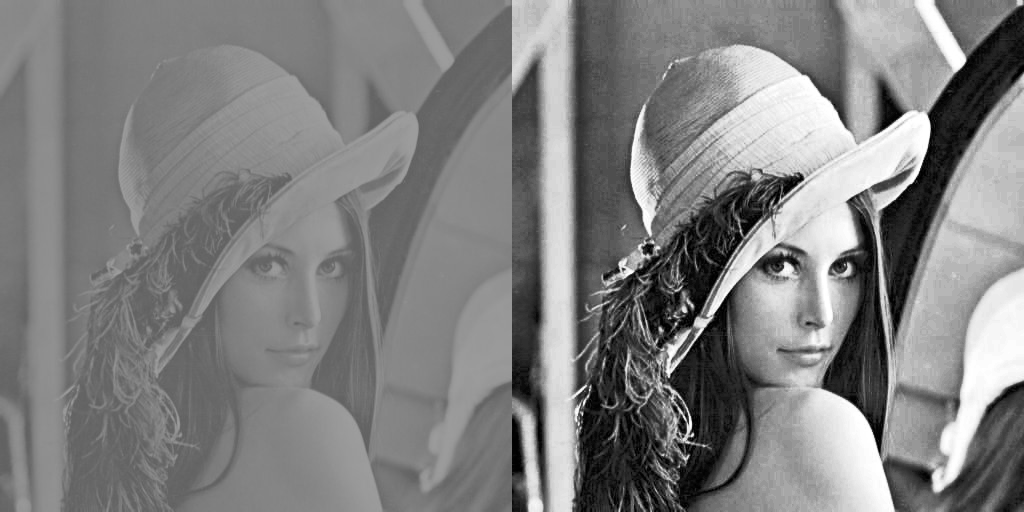

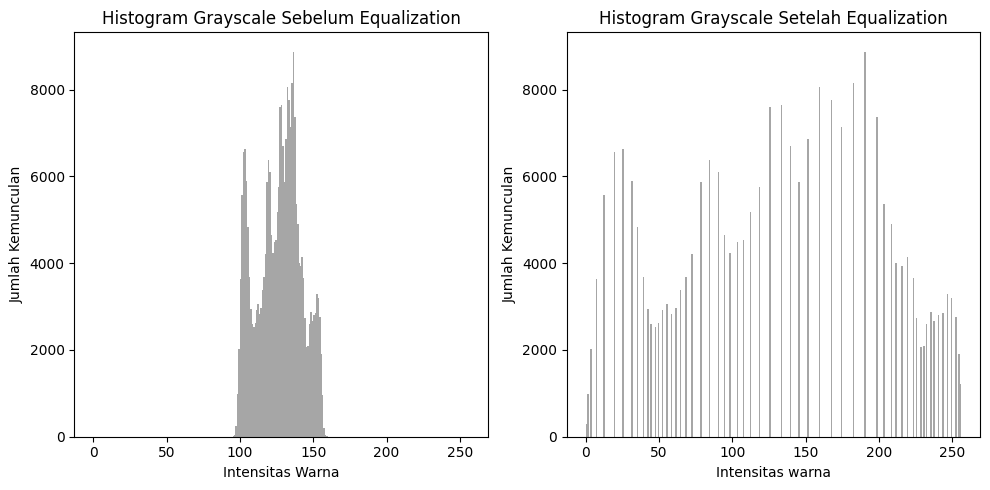

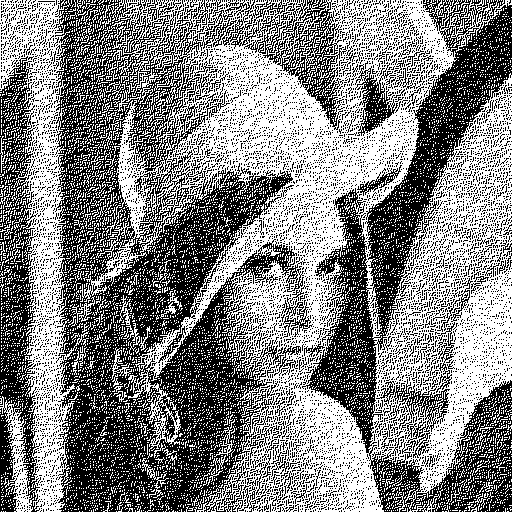

In [11]:
img3 = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(img3.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Sebelum Equalization')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

equalized_img = cv.equalizeHist(img3)

plt.subplot(122)
plt.hist(equalized_img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Setelah Equalization')
plt.xlabel('Intensitas warna')
plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()

img_float = np.float32(equalized_img)
height, width = img3.shape

for y in range(height):
    for x in range(width):
        old_value = img_float[y, x]
        new_value = round(old_value / 255) * 255
        img_float[y, x] = new_value

        error = old_value - new_value

        if x < width - 1:
            img_float[y, x + 1] += error * 10 / 16
        if y < height - 1:
            if x > 0:
                img_float[y + 1, x - 1] += error * 7 / 16
            img_float[y + 1, x] += error * 4 / 16
            if x < width - 1:
                img_float[y + 1, x + 1] += error * 15 / 16

output_img = np.uint8(img_float)

final_frame = cv.hconcat((img3, equalized_img))
cv2_imshow(final_frame)
plt.show()
cv2_imshow(output_img)